In [21]:
import torchvision
import torch
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import nn
from torch import optim
from torch.autograd import Variable

In [4]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = 1.0 * random.randint(0,1)
    x2 = 1.0 * random.randint(0,1)
    y = 1.0 * np.logical_xor(x1==1,x2==1)
    x1 = x1 + 0.15 * np.random.normal()
    x2 = x2 + 0.15 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y
        
data.head()

,x1,x2,y
0,1.200290,0.895679,0.0
1,1.179370,0.714096,0.0
2,1.029590,-0.272521,1.0
3,1.063014,0.789944,0.0
4,1.229923,-0.023558,1.0


In [5]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X = np.matrix(X.values)
y = np.matrix(y.values)

In [6]:
# Sloppy function for plotting our data
def plot_data(X, y_prob):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y_prob > 0.5
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Noisy XOR')
    plt.show()

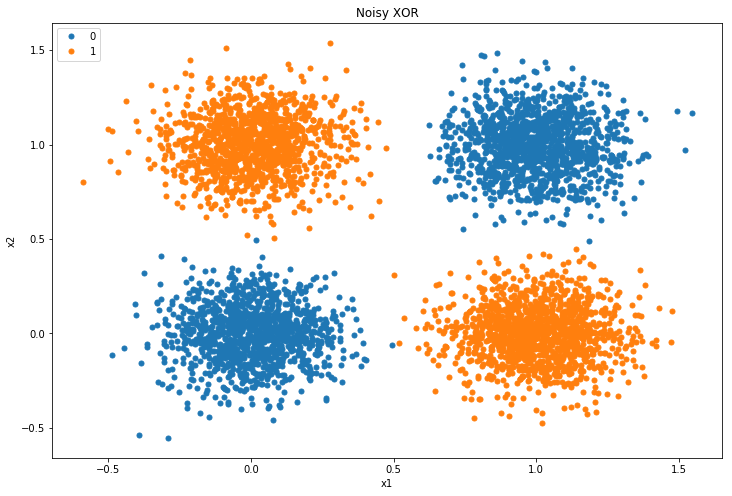

In [7]:
plot_data(X, y)

In [95]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(2, 16)
        self.layer2 = nn.Linear(16, 1)
        self.relu = nn.ReLU(inplace = True)
    
    def forward(self, x):
        x = self.layer2(self.relu(self.layer1(x)))
        return x

In [96]:
def train():
    for epoch in range(num_epochs):
        model.train()
        for i in tqdm(range(0, n, batch_size)):
            batch_idx = idx[i:i + batch_size]
            data = torch.Tensor(X[batch_idx, :])
            labels = torch.Tensor(y[batch_idx, ::])
            data, labels = Variable(data), Variable(labels)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output * (1.0 - 2*labels))
            loss.sum().backward()
            optimizer.step()
#             print('Train Epoch: {%d} [{%d}/{%d}]\tLoss: {%.6f}' %(
#                 epoch, i * batch_size, X.shape[0], loss.data[0]))
            
    
        model.eval()
        test_loss = 0
        correct = 0
        test_idx = np.arange(n, n + test_n)
        for i in tqdm(range(0, test_n, batch_size)):
            batch_idx = test_idx[i:i + batch_size]
            data = torch.Tensor(X[batch_idx, ::])
            labels = torch.Tensor(y[batch_idx, :])
            data, labels = Variable(data), Variable(labels)

            test_loss += criterion(output * (1.0 - 2*labels)).data[0] # sum up batch loss
            pred = output.data.max(1, keepdim = True)[1] # get the index of the max log-probability
            pred = output.data
            pred[pred >= 0] = 1.0
            pred[pred < 0] = 0.0
    #         pred = torch.FloatTensor(pred)
    #         print(labels)
            pred, labels = pred.type(torch.FloatTensor), labels.type(torch.FloatTensor)
            correct += pred.eq(labels.data.view_as(pred)).cpu().sum()

        test_loss /= test_n
        print('\nTest set: Average loss: {%.4f}, Accuracy: %d/%d (%.3f)\n' %(
            test_loss, correct, test_n, correct/test_n*100.0))


In [100]:
batch_size = 1000
num_epochs = 20

model = Network()
criterion = nn.Softplus()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

n = X.shape[0]
test_n = batch_size
n = n - test_n
print(n, test_n)
idx = np.arange(n)
test_idx = np.arange(n, n + test_n)

train()

  0%|          | 0/4 [00:00<?, ?it/s]

4000 1000

Test set: Average loss: {0.0009}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0447}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0447}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0447}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)



100%|██████████| 1/1 [00:00<00:00, 860.55it/s]


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)


Test set: Average loss: {0.0448}, Accuracy: 492/1000 (49.200)

